In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('../data-sets/healthcare-dataset-stroke-data.csv', index_col='id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.dropna(axis=1, inplace=True)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
id,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [5]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

In [6]:
# Initialize OneHotEncoder with the correct parameter
# Select the columns to encode
columns_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
def map_to_replace(columns):
    # Iterate through each column in the list
    for column in columns:
        if(df[column].dtype == 'object'):
            unique_map = {} 
            count = 0
            for i in df[column].unique():
                unique_map[str(i)] = count 
                count += 1 
            df[column] = df[column].map(unique_map)

map_to_replace(columns_to_encode)
print(df.head().to_string())
print(df.corr().to_string())

       gender   age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  smoking_status  stroke
id                                                                                                                                  
9046        0  67.0             0              1             0          0               0             228.69               0       1
51676       1  61.0             0              0             0          1               1             202.21               1       1
31112       0  80.0             0              1             0          0               1             105.92               1       1
60182       1  49.0             0              0             0          0               0             171.23               2       1
1665        1  79.0             1              0             0          1               1             174.12               1       1
                     gender       age  hypertension  heart_disease  e

In [7]:
df.drop(['work_type', 'Residence_type', 'ever_married', 'gender', 'smoking_status'], axis=1, inplace=True)
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [8]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,stroke
age,1.000000,0.276398,0.263796,0.238171,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.131945
stroke,0.245257,0.127904,0.134914,0.131945,1.000000


In [9]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4088, 4) (1022, 4) (4088,) (1022,)


In [11]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
y_probs = model.predict_proba(x_test)[:,1]
y_pred = model.predict(x_test)

In [13]:
roc_auc = roc_auc_score(y_test, y_probs)


# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confMatrx = confusion_matrix(y_test, y_pred)
#Print the metrics
print(f"AUC - ROC Score: {roc_auc:.2f}")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


AUC - ROC Score: 0.85
Accuracy : 0.94
Precision : 0.00
Recall: 0.00
F1 Score: 0.00


c:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


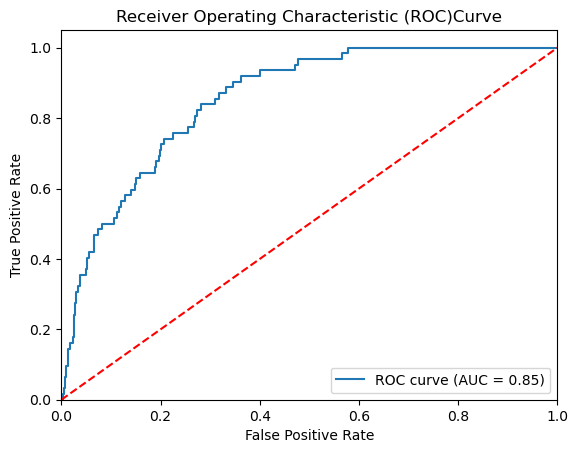

In [14]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds =roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)Curve')
plt.legend(loc='lower right')
plt.show()

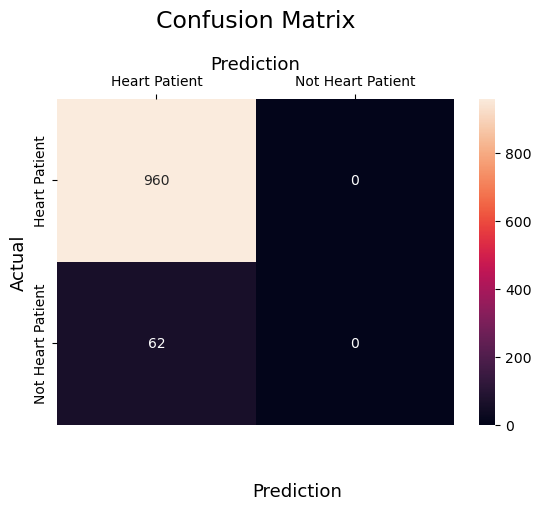

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confMatrx, annot=True, fmt='g', xticklabels=['Heart Patient', 'Not Heart Patient'], yticklabels=['Heart Patient', 'Not Heart Patient'])
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Prediction', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()